# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно провести исследовательский анализ данных и установить параметры, влияющие на цену объектов. 

**Описание данных**

`airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)

`balcony` — число балконов

`ceiling_height` — высота потолков (м)

`cityCenters_nearest` — расстояние до центра города (м)

`days_exposition` — сколько дней было размещено объявление (от публикации до снятия)

`first_day_exposition` — дата публикации

`floor` — этаж

`floors_total` — всего этажей в доме

`is_apartment` — апартаменты (булев тип)

`kitchen_area` — площадь кухни в квадратных метрах (м²)

`last_price` — цена на момент снятия с публикации

`living_area` — жилая площадь в квадратных метрах (м²)

`locality_name` — название населённого пункта

`open_plan` — свободная планировка (булев тип)

`parks_around3000` — число парков в радиусе 3 км

`parks_nearest` — расстояние до ближайшего парка (м)

`ponds_around3000` — число водоёмов в радиусе 3 км

`ponds_nearest` — расстояние до ближайшего водоёма (м)

`rooms` — число комнат

`studio` — квартира-студия (булев тип)

`total_area` — общая площадь квартиры в квадратных метрах (м²)

`total_images` — число фотографий квартиры в объявлении

**Содержание исследования**
1. [Первичное ознакомление с данными](#start)
2. [Предобработка данных](#preprocessing)
    * [Первичная обработка](#first)
    * [Обработка пропусков и аномальных значений](#null)
    * [Добавление новых стобцов](#columns)
3. [Анализ данных: влияние различных факторов на цену квартиры](#analyses)
    * [Общая площадь](#total_area)
    * [Жилая площадь](#living_area)
    * [Площадь кухник](#kitchen)
    * [Аномальные цены](#low_price)
    * [Количество комнат](#room_number)
    * [Высота потолков](#сeiling_height)
    * [Тип этажа квартиры («первый», «последний», «другой»)](#floor_type)
    * [Общее количество этажей в доме](#floor_number)
    * [Анализ скорости продажи квартир](#speed)
    * [Факторы, которые больше всего влияют на общую (полную) стоимость объекта](#factors)
    * [Cредняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений](#average_price)
    * [Квартиры в Санкт-Петербурге и их среднюю стоимость на разном удалении от центра](#Piter)

<a id="start"></a> 

## Первичное ознакомление с данными

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

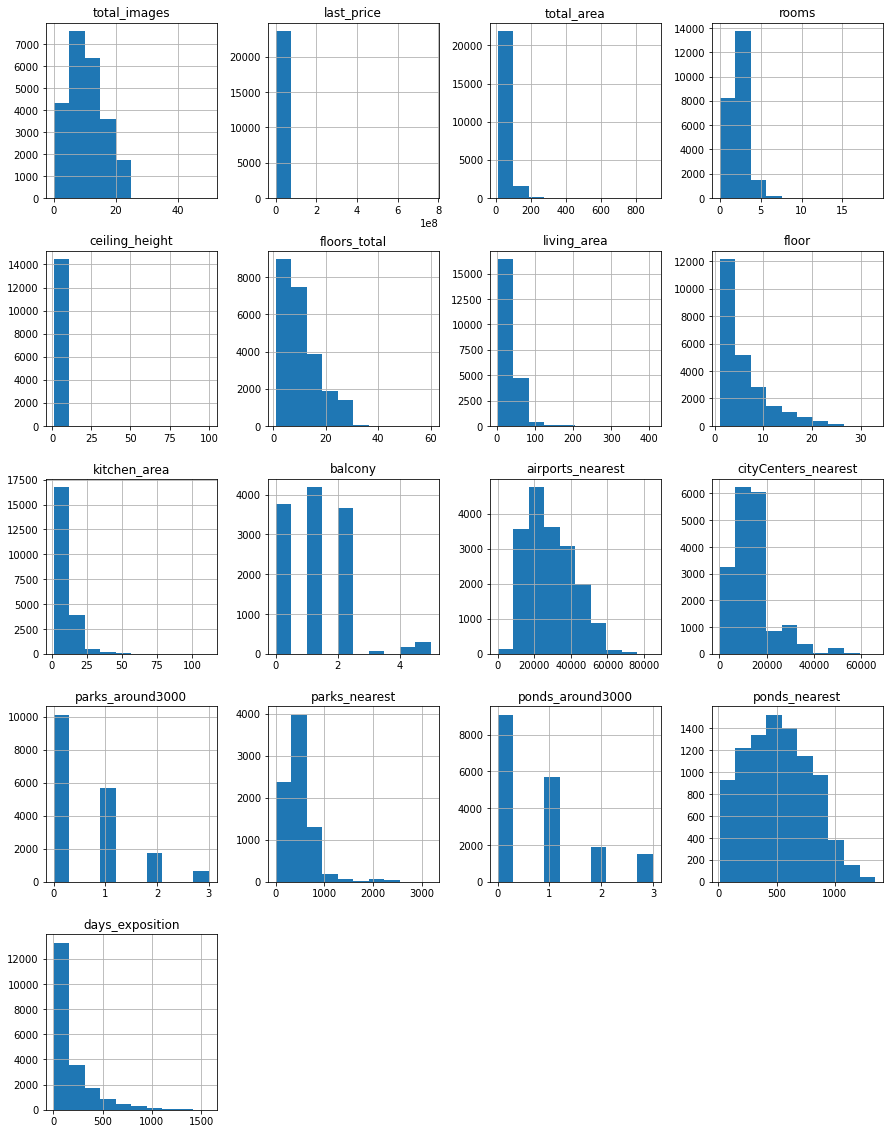

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t') #сохраняем в переменную дата данные сервиса Яндекс Недвижимость
data.hist(figsize=(15, 20)); #Строим гистограмму для всех числовых столбцов таблицы на одном графике

<a id="preprocessing"></a> 
## Пердобработка данных
<a id="first"></a> 
### Первичный анализ данных

In [3]:
data.info() #вызываем информацию о таблице чтобы определить типы данных и очевидные пропуски
print(f'Количество дубликатов строк: {data.duplicated().sum()}')
pd.set_option('display.max_columns', None)
data.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


**Из первичного анализа данных выше можем сделать следующие выводы:**
1) В `first_day_exposition` содержиться смешенный тип данных необходимо привести его к формату `datetime64`, чтобы с ним удобно было работать

2) В столбце `balcony` должно быть целое число.

3) В столбце `is_apartment` слишком много пропусков, причем булев тип значений перепутан с другими типами.

4) Больше всего пропусков, помимо столбца выше в столбцах `ponds_nearest ` и `parks_nearest`.

5) Так же пропуски есть в стобцах `ceiling_height`,`living_area`,`kitchen_area`,`balcony`, `airports_nearest`, `cityCenters_nearest`,`parks_around3000`,` ponds_around3000`, `days_exposition` и незначительное количество пропусков в `floors_total` и `locality_name`.

6) В таблице нет дублированных строк.

7) Нужно поменять название столбца `cityCenters_nearest` к змеиному регистру

<a id="null"></a> 
### **Обработка пропусков и аномальных значений**
#####  Cтолбец `is_apartment` 

In [4]:
data ['is_apartment'].unique() #Узнаём, какие значения содержаться в столбце

array([nan, False, True], dtype=object)

На мой взгляд слишком много пропусков и нет достоверного способа, который нам поможет пропуски заполнить, поэтому этот столбец не будем учитывать в анализе.

#####  Cтолбцы `ceiling_height`,`living_area`, `floors_total`

Пропуски во всех этих столбцах можно заменить медианным значением по квартирам с таким же количеством комнат

In [5]:
data['rooms'].value_counts()

1     8047
2     7940
3     5814
4     1180
5      326
0      197
6      105
7       59
8       12
9        8
10       3
11       2
14       2
19       1
16       1
12       1
15       1
Name: rooms, dtype: int64

In [6]:
data.drop(data[data['rooms'] > 9].index, inplace=True) #Удалим строки с комнатами больше 9

В таблице небольшое количество квартир имеет больше чем 7 команат, объединим их в группу 7+

Ещё есть квартиры, где меньше 0 комнат, нужно проверить всё ли из них студии. Прежде, чем делать замены на основе количества комнат нужно разобраться с этими квартирами

In [7]:
data.loc[data['rooms'] >= 7, 'rooms'] = '7+'
data['rooms'].value_counts()

1     8047
2     7940
3     5814
4     1180
5      326
0      197
6      105
7+      79
Name: rooms, dtype: int64

In [8]:
data['rooms'][(data['studio'] == True) & (data['rooms'] == 0)].count() #считаем количество студий, у которых количество комнат равно нулю

138

Существует 197 квартир с 0 комнатами и только 138 из них студии

In [9]:
data['rooms'][(data['studio'] == True)].count() 

149

А всего студий 149. Посмотрим сколько комнат в других студиях

In [10]:
data['rooms'][(data['studio'] == True) & (data['rooms'] != 0)]

2389     1
3187     1
4180     1
8683     1
11026    1
12935    1
15142    1
18732    1
20086    1
21702    1
22652    1
Name: rooms, dtype: object

По одной. Их незначительное количество, но раз мы их нашли, то заменим на 0

In [11]:
data.loc[(data['studio'] == True) & (data['rooms'] != 0), 'rooms'] = 0

А теперь разбёрёмся с остальными нулевыми комнатами

In [12]:
data[(data['studio'] == False) & (data['rooms'] == 0)]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
349,4,2320000.0,25.00,2017-09-27T00:00:00,0,NaN,14.0,17.0,1,NaN,False,True,NaN,0.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,45.0
508,0,3375000.0,34.40,2017-03-28T00:00:00,0,NaN,26.0,24.3,19,NaN,False,True,NaN,1.0,посёлок Парголово,53115.0,19292.0,0.0,NaN,1.0,593.0,430.0
780,9,2600000.0,26.10,2018-02-20T00:00:00,0,NaN,18.0,NaN,8,NaN,False,True,NaN,1.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,45.0
839,14,1900000.0,35.00,2017-04-14T00:00:00,0,2.70,5.0,15.0,3,False,False,True,NaN,1.0,поселок Новый Свет,NaN,NaN,NaN,NaN,NaN,NaN,7.0
946,5,2200000.0,23.00,2016-09-27T00:00:00,0,NaN,27.0,18.0,7,NaN,False,True,NaN,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,483.0
1574,0,2200000.0,22.00,2017-11-03T00:00:00,0,NaN,18.0,15.0,16,NaN,False,True,NaN,1.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,81.0
1625,7,1980000.0,23.98,2018-02-01T00:00:00,0,NaN,4.0,10.5,3,NaN,False,True,NaN,1.0,поселок станции Корнево,NaN,NaN,NaN,NaN,NaN,NaN,120.0
2532,5,3500000.0,27.10,2018-02-01T00:00:00,0,NaN,18.0,18.7,9,NaN,False,True,NaN,2.0,Санкт-Петербург,32036.0,8175.0,0.0,NaN,1.0,644.0,70.0
3019,18,2100000.0,24.00,2017-11-10T00:00:00,0,NaN,10.0,18.0,6,NaN,False,True,NaN,2.0,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN,5.0
4115,7,2600000.0,24.00,2018-02-01T00:00:00,0,NaN,25.0,18.0,4,NaN,False,True,NaN,2.0,Санкт-Петербург,10031.0,13330.0,1.0,915.0,0.0,NaN,42.0


Жилая площадь этих квартир говорит о том, что это скорее всего это именно студии, просто ошибка в столбце `studio`. Заменим значение на правильное. Для простоты по всем квартирам с количеством комнат о поставим значение True. В этом случае получается, что столбец `studio` не нужен

In [13]:
data.loc[data['rooms'] == 0, 'studio'] = True

In [14]:
data [data['ceiling_height']>7] #пронализируем показатели столбца 'ceiling_height', чтобы убрать аномальные значения, взяв максимальное значение высоты 7 м

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
355,17,3600000.0,55.2,2018-07-12T00:00:00,2,25.0,5.0,32.0,2,False,False,False,NaN,2.0,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,259.0
3148,14,2900000.0,75.0,2018-11-12T00:00:00,3,32.0,3.0,53.0,2,NaN,False,False,8.0,NaN,Волхов,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3474,3,1400000.0,30.0,2018-03-16T00:00:00,1,8.0,5.0,15.3,2,False,False,False,7.3,NaN,деревня Нурма,NaN,NaN,NaN,NaN,NaN,NaN,125.0
4643,0,4300000.0,45.0,2018-02-01T00:00:00,2,25.0,9.0,30.0,2,NaN,False,False,7.0,1.0,Санкт-Петербург,12016.0,13256.0,1.0,658.0,1.0,331.0,181.0
4876,7,3000000.0,25.0,2017-09-27T00:00:00,0,27.0,25.0,17.0,17,NaN,True,True,NaN,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,28.0
5076,0,3850000.0,30.5,2018-10-03T00:00:00,1,24.0,5.0,19.5,1,True,False,False,5.5,NaN,Санкт-Петербург,29686.0,8389.0,3.0,397.0,1.0,578.0,7.0
5246,0,2500000.0,54.0,2017-10-13T00:00:00,2,27.0,5.0,30.0,3,NaN,False,False,9.0,2.0,деревня Мины,NaN,NaN,NaN,NaN,NaN,NaN,540.0
5669,4,4400000.0,50.0,2017-08-08T00:00:00,2,26.0,9.0,21.3,3,NaN,False,False,7.0,2.0,Санкт-Петербург,28981.0,10912.0,1.0,305.0,0.0,NaN,267.0
5807,17,8150000.0,80.0,2019-01-09T00:00:00,2,27.0,36.0,41.0,13,NaN,False,False,12.0,5.0,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,38.0
5863,20,5650000.0,45.0,2018-08-15T00:00:00,1,8.3,16.0,19.3,14,NaN,False,False,8.3,1.0,Санкт-Петербург,13069.0,10763.0,0.0,NaN,1.0,613.0,14.0


In [15]:
for t in data['rooms'].unique(): #заменим эти значени на медианные по группе
      data.loc[(data['rooms'] == t) & (data['ceiling_height']>7), 'ceiling_height'] = \
    data.loc[(data['rooms'] == t), 'ceiling_height'].median()
data [data['ceiling_height']>7] #проверим остались ли такие столбцы

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


In [16]:
for t in data['rooms'].unique(): #заменим пропуски 'ceiling heights' медианным значением показателя квартир с таким же количеством комнат
    data.loc[(data['rooms'] == t) & (data['ceiling_height'].isna()), 'ceiling_height'] = \
    data.loc[(data['rooms'] == t), 'ceiling_height'].median()
data[data['ceiling_height'].isna()==True] 

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


Теперь проанализируем сильно низкие потолки

In [17]:
data [data['ceiling_height']<2]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
5712,5,1500000.0,42.8,2017-08-14T00:00:00,2,1.20,2.0,27.5,1,NaN,False,False,5.20,NaN,городской посёлок Мга,NaN,NaN,NaN,NaN,NaN,NaN,248.0
16934,5,4100000.0,40.0,2017-10-17T00:00:00,1,1.75,37.0,17.4,5,NaN,False,False,8.34,NaN,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,71.0
22590,16,6000000.0,55.0,2018-10-31T00:00:00,2,1.00,12.0,32.4,7,NaN,False,False,10.00,NaN,Санкт-Петербург,33053.0,14217.0,2.0,293.0,2.0,289.0,13.0


In [18]:
for t in data['rooms'].unique(): #заменим nтакие значения 'ceiling heights' медианным значением показателя квартир с таким же количеством комнат
    data.loc[(data['rooms'] == t) & (data['ceiling_height']<2), 'ceiling_height'] = \
    data.loc[(data['rooms'] == t), 'ceiling_height'].median()
data[data['ceiling_height'].isna()==True] 

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


In [19]:
# проанализируем аномальные значения столбца `living_area' 
data[data['living_area']>data['total_area']]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


<AxesSubplot:>

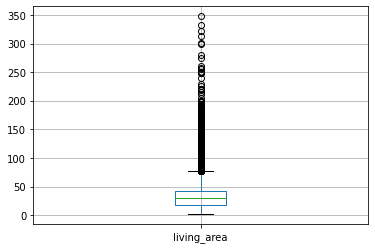

In [20]:
data.boxplot ('living_area')

In [21]:
data[data['living_area']>200]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
660,3,49950000.0,483.9,2017-10-04T00:00:00,7+,3.200,6.0,312.5,4,NaN,False,False,26.4,NaN,Санкт-Петербург,23079.0,945.0,3.0,461.0,3.0,22.0,391.0
793,20,135000000.0,310.0,2018-05-22T00:00:00,4,3.300,5.0,250.0,2,NaN,False,False,50.0,NaN,Санкт-Петербург,34159.0,7251.0,2.0,295.0,3.0,190.0,342.0
1085,16,75000000.0,323.0,2017-07-10T00:00:00,5,4.000,5.0,255.7,4,NaN,False,False,66.0,NaN,Санкт-Петербург,23713.0,594.0,3.0,398.0,2.0,515.0,259.0
1494,10,65000000.0,364.0,2018-11-27T00:00:00,7+,3.900,6.0,250.0,3,NaN,False,False,20.0,NaN,Санкт-Петербург,21988.0,3254.0,0.0,NaN,1.0,689.0,46.0
2580,6,30900000.0,338.6,2017-10-16T00:00:00,7+,3.860,6.0,230.0,4,NaN,False,False,20.0,NaN,Санкт-Петербург,24957.0,5641.0,0.0,NaN,0.0,NaN,406.0
4237,1,50000000.0,517.0,2017-10-14T00:00:00,7+,3.325,4.0,332.0,3,NaN,False,False,22.0,NaN,Санкт-Петербург,22835.0,1847.0,2.0,477.0,2.0,540.0,NaN
6221,8,34000000.0,470.3,2018-01-14T00:00:00,4,2.800,3.0,248.7,3,NaN,False,False,40.0,NaN,Санкт-Петербург,43756.0,15459.0,1.0,852.0,3.0,122.0,179.0
6621,20,99000000.0,488.0,2017-04-09T00:00:00,5,2.950,20.0,216.0,17,NaN,False,False,50.0,NaN,Санкт-Петербург,27641.0,4598.0,1.0,646.0,1.0,368.0,351.0
7857,11,150000000.0,230.0,2017-10-25T00:00:00,7+,3.325,8.0,220.0,8,NaN,False,False,NaN,NaN,Санкт-Петербург,25525.0,5845.0,2.0,116.0,0.0,NaN,135.0
8018,20,84000000.0,507.0,2015-12-17T00:00:00,5,4.450,7.0,301.5,7,True,False,False,45.5,1.0,Санкт-Петербург,NaN,5735.0,2.0,110.0,0.0,NaN,1078.0


Значения высокие, но и количество комнат и цены соответсвующие. Значит в них нет ничего аномального

In [22]:
data[data['living_area']<10]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
114,5,4000000.0,21.40,2019-02-07T00:00:00,1,2.90,8.0,8.3,7,NaN,False,False,6.3,NaN,Санкт-Петербург,27089.0,5791.0,2.0,488.0,1.0,286.0,NaN
680,14,7200000.0,43.00,2017-10-31T00:00:00,1,2.64,8.0,9.0,2,NaN,False,False,23.0,NaN,Санкт-Петербург,23900.0,5232.0,1.0,2137.0,1.0,933.0,296.0
1326,8,8100000.0,52.00,2017-01-29T00:00:00,2,2.70,25.0,9.0,15,NaN,False,False,32.0,2.0,Санкт-Петербург,35555.0,15561.0,0.0,NaN,1.0,1180.0,337.0
2309,10,4200000.0,62.40,2017-06-15T00:00:00,2,2.60,9.0,8.4,6,NaN,False,False,41.0,2.0,посёлок Шушары,23662.0,29448.0,0.0,NaN,0.0,NaN,111.0
3242,7,4440000.0,41.00,2017-07-02T00:00:00,1,2.64,17.0,3.0,17,NaN,False,False,11.0,NaN,Санкт-Петербург,19272.0,13073.0,0.0,NaN,0.0,NaN,216.0
4100,17,5300000.0,34.80,2017-06-19T00:00:00,1,2.70,23.0,9.0,15,NaN,False,False,17.1,0.0,Санкт-Петербург,33626.0,13495.0,0.0,NaN,0.0,NaN,30.0
4542,12,3300000.0,18.00,2018-11-07T00:00:00,1,3.50,5.0,9.0,2,NaN,False,False,NaN,NaN,Санкт-Петербург,25157.0,4948.0,2.0,349.0,1.0,963.0,9.0
7312,8,3400000.0,27.00,2018-02-21T00:00:00,2,2.50,15.0,9.0,4,NaN,False,False,16.0,NaN,Санкт-Петербург,50246.0,16444.0,1.0,617.0,0.0,NaN,NaN
8325,9,4800000.0,52.00,2017-10-25T00:00:00,2,2.60,5.0,9.0,2,NaN,False,False,6.0,1.0,Санкт-Петербург,33358.0,13171.0,0.0,NaN,2.0,118.0,119.0
13915,20,6350000.0,52.00,2018-02-06T00:00:00,2,3.00,6.0,2.0,2,NaN,False,False,9.0,NaN,Санкт-Петербург,32453.0,6521.0,0.0,NaN,1.0,1012.0,91.0


А вот это уже точно аномалия, при том, что общая площадь иногда меньше, чем площадь кухни. Особенно смущает трёхкомнатная квартира с общей жилой площадью в 139 метров и жилов в 3 метра. Заменим такие значение медианными значениями по количеству комнат

In [23]:
for t in data['rooms'].unique(): #заменим эти значени на медианные по группе
      data.loc[(data['rooms'] == t) & (data['living_area']<10), 'living_area'] = \
    data.loc[(data['rooms'] == t), 'living_area'].median()
data [data['living_area']<10] #проверим остались ли такие столбцы

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


In [24]:
for t in data['rooms'].unique():  #заменим пропуски 'living area' медианным значением показателя квартир с таким же количеством комнат
    data.loc[(data['rooms'] == t) & (data['living_area'].isna()), 'living_area'] = \
    data.loc[(data['rooms'] == t), 'living_area'].median()
data['living_area'].isna().sum()

0

In [25]:
for t in data['rooms'].unique():  #заменим пропуски 'floors total' медианным значением показателя квартир с таким же количеством комнат
    data.loc[(data['rooms'] == t) & (data['floors_total'].isna()), 'floors_total'] = \
    round(data.loc[(data['rooms'] == t), 'floors_total'].median()) #округляем, чтобы не было половинных этажей
data['floors_total'].isna().sum()
data['floors_total'] = data['floors_total'].astype(int) # превращаем тип данных в целые значения

##### Столбец `kitchen_area`

Тут пропуски в студиях, так как у них нет кухни. Замним на ноль. Но для начала проверим теорию

In [26]:
data[(data['studio'] == True) & (~data['kitchen_area'].isna())] # Таблица пустая, значит верно

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


In [27]:
data['kitchen_area'] = data['kitchen_area'].fillna(0) 
data ['kitchen_area'].isna().sum() # провеярем не осталось ли пустых значений

0

##### Столбец `total_area` аномальные значения

In [28]:
filtered_data = data[(data['living_area']+data['kitchen_area'])>data['total_area']]
filtered_data [['total_area', 'living_area', 'kitchen_area']]

,total_area,living_area,kitchen_area
114,21.40,17.60,6.30
184,30.20,26.10,6.20
545,23.80,20.00,5.00
551,31.59,30.55,9.28
601,53.70,48.30,7.00
...,...,...,...
22306,41.00,45.00,0.00
22356,17.20,17.60,0.00
22473,33.26,30.50,16.40
23202,67.92,63.00,13.04


Заменим в таких столбцах общую площадь на cумму этих столбцов плюс медианное значение разницы между суммы столбцов kitchen_area+living_area и total area

In [29]:
for t in data['rooms'].unique():  #заменим аномальные значения'total_area'
    median_total_area = data.loc[data['rooms'] == t, 'total_area'].median()
    median_kitchen_area = data.loc[data['rooms'] == t, 'kitchen_area'].median()
    median_living_area = data.loc[data['rooms'] == t, 'living_area'].median()
    data.loc[(data['rooms'] == t) & ((data['living_area'] + data['kitchen_area']) > data['total_area']), 'total_area'] = \
        data['living_area'] + data['kitchen_area'] + (median_total_area - median_living_area - median_kitchen_area)
filtered_data = data[(data['living_area']+data['kitchen_area'])>data['total_area']]
filtered_data [['total_area', 'living_area', 'kitchen_area']]

,total_area,living_area,kitchen_area


##### Пропуски в столбце `balcony`
Мы решили, что пропуски есть там, где нет баконов, поэтому заменим все пропуски на нули

In [30]:
data['balcony'] = data['balcony'].fillna(0) 
data ['balcony'].isna().sum() # провеярем не осталось ли пустых значений

0

##### Обрабатываем столбец с датой и заполняем пропуски в столбце `days_exposition`

In [103]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%d') #Переводим строку в дату, времени у нас нет
print (data['first_day_exposition'].head)

<bound method NDFrame.head of 0       2019-03-07
1       2018-12-04
2       2015-08-20
3       2015-07-24
4       2018-06-19
           ...    
23694   2017-03-21
23695   2018-01-15
23696   2018-02-11
23697   2017-03-28
23698   2017-07-21
Name: first_day_exposition, Length: 23621, dtype: datetime64[ns]>


##### Обрабатываем столбец `locality_name`

In [32]:
data['locality_name'] = data['locality_name'].fillna('Не указано') 
sorted(data['locality_name'].unique())#выведем на экран все значения, чтобы обработать неочевидные дубликаты

['Бокситогорск',
 'Волосово',
 'Волхов',
 'Всеволожск',
 'Выборг',
 'Высоцк',
 'Гатчина',
 'Зеленогорск',
 'Ивангород',
 'Каменногорск',
 'Кингисепп',
 'Кириши',
 'Кировск',
 'Колпино',
 'Коммунар',
 'Красное Село',
 'Кронштадт',
 'Кудрово',
 'Лодейное Поле',
 'Ломоносов',
 'Луга',
 'Любань',
 'Мурино',
 'Не указано',
 'Никольское',
 'Новая Ладога',
 'Отрадное',
 'Павловск',
 'Петергоф',
 'Пикалёво',
 'Подпорожье',
 'Приморск',
 'Приозерск',
 'Пушкин',
 'Санкт-Петербург',
 'Светогорск',
 'Сертолово',
 'Сестрорецк',
 'Сланцы',
 'Сосновый Бор',
 'Сясьстрой',
 'Тихвин',
 'Тосно',
 'Шлиссельбург',
 'городской поселок Большая Ижора',
 'городской поселок Янино-1',
 'городской посёлок Будогощь',
 'городской посёлок Виллози',
 'городской посёлок Лесогорский',
 'городской посёлок Мга',
 'городской посёлок Назия',
 'городской посёлок Новоселье',
 'городской посёлок Павлово',
 'городской посёлок Рощино',
 'городской посёлок Свирьстрой',
 'городской посёлок Советский',
 'городской посёлок Фёдоровс

In [33]:
data.loc[data['locality_name'].str.contains('Янино-1'), 'locality_name'] = 'посёлок городского типа Янино-1'
data.loc[data['locality_name'].str.contains('Мур'), 'locality_name'] = 'посёлок Мурино'
data.loc[data['locality_name'].str.contains('Коробицыно'), 'locality_name'] = 'посёлок Коробицыно'
data.loc[data['locality_name'].str.contains('Кудрово'), 'locality_name'] = 'деревня Кудрово'
data.loc[data['locality_name'].str.contains('Любань'), 'locality_name'] = 'посёлок Любань'
data.loc[data['locality_name'].str.contains('Никольское'), 'locality_name'] = 'село Никольское'
data.loc[data['locality_name'].str.contains('Большая Ижора'), 'locality_name'] = 'посёлок городского типа Большая Ижора'
data.loc[data['locality_name'].str.contains('Будогощь'), 'locality_name'] = 'посёлок городского типа Будогощь'
data.loc[data['locality_name'].str.contains('Виллози'), 'locality_name'] = 'посёлок городского типа Виллози'
data.loc[data['locality_name'].str.contains('Лесогорский'), 'locality_name'] = 'посёлок городского типа Лесогорский'
data.loc[data['locality_name'].str.contains('Мга'), 'locality_name'] = 'посёлок городского типа Мга'
data.loc[data['locality_name'].str.contains('Назия'), 'locality_name'] = 'посёлок городского типа Назия'
data.loc[data['locality_name'].str.contains('Новоселье'), 'locality_name'] = 'посёлок городского типа Новоселье'
data.loc[data['locality_name'].str.contains('посёлок Павлово'), 'locality_name'] = 'посёлок городского типа Павлово'
data.loc[data['locality_name'].str.contains('Рощино'), 'locality_name'] = 'посёлок городского типа Рощино'
data.loc[data['locality_name'].str.contains('посёлок Свирьстрой'), 'locality_name'] = 'посёлок городского типа Свирьстрой'
data.loc[data['locality_name'].str.contains('Советский'), 'locality_name'] = 'посёлок городского типа Советский'
data.loc[data['locality_name'].str.contains('городской посёлок Фёдоровское'), 'locality_name'] = 'посёлок городского типа Фёдоровское'
data.loc[data['locality_name'].str.contains('Громово'), 'locality_name'] = 'посёлок Громово'
data.loc[data['locality_name'].str.contains('Лесное'), 'locality_name'] = 'коттеджный посёлок Лесное'
data['locality_name'] = data['locality_name'].apply(str.replace, args=('поселок', 'посёлок'))
data.loc[data['locality_name'].str.contains('Рябово'), 'locality_name'] = 'посёлок городского типа Рябово'
data.loc[data['locality_name'].str.contains('Приветнинское'), 'locality_name'] = 'посёлок при железнодорожной станции Приветнинское'
data.loc[data['locality_name'].str.contains('садовое товарищество Приладожский'), 'locality_name'] = 'посёлок городского типа Приладожский'

##### В столбцах `airports_nearest`, `cityCenters_nearest`, `parks_around3000`, `ponds_around3000` заполним пропуски медианными значениями по насёлённым пунктам

In [34]:
for t in data['locality_name'].unique():
    data.loc[(data['locality_name'] == t) & (data['airports_nearest'].isna()), 'airports_nearest'] = \
    data.loc[(data['locality_name'] == t), 'airports_nearest'].median() 
data['airports_nearest'].isna().sum()

/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/p

/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/p

/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/p

/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/p

4830

In [35]:
data.rename(columns={'cityCenters_nearest': 'city_centers_nearest'}, inplace=True) #переименуем столбец, приведя его к змеиному регистру
for t in data['locality_name'].unique():
    data.loc[(data['locality_name'] == t) & (data['city_centers_nearest'].isna()), 'city_centers_nearest'] = \
    data.loc[(data['locality_name'] == t), 'city_centers_nearest'].median()
data['city_centers_nearest'].isna().sum()

/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/p

/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/p

/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/p

/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/p

/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/p

4830

**У большого количества насёлённых пунктов эти данные отстутствуют, но всё равно пропусков стало уже меньше**

Теперь парки и водоёмы

In [36]:
for t in data['locality_name'].unique():
    data.loc[(data['locality_name'] == t) & (data['parks_around3000'].isna()), 'parks_around3000'] = \
    data.loc[(data['locality_name'] == t), 'parks_around3000'].median()
data['parks_around3000'] = data['parks_around3000'].fillna(0) #в остальных случаях примем это значение равным нулю, ведь если покупатели не знают о парках, то можно считать, что их нет
data['parks_around3000'] = data['parks_around3000'].astype(int) #приведём столбец к целому числу
for t in data['locality_name'].unique():
    data.loc[(data['locality_name'] == t) & (data['parks_nearest'].isna()), 'parks_nearest'] = \
    data.loc[(data['locality_name'] == t), 'parks_nearest'].median()
print (data['parks_nearest'].isna().sum())
data['parks_around3000'].isna().sum()

/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/p

/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/p

/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/p

/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/p

/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/p

/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/p

/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/p

/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/p

/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/p

5998


/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/p

0

In [37]:
for t in data['locality_name'].unique():
    data.loc[(data['locality_name'] == t) & (data['ponds_around3000'].isna()), 'ponds_around3000'] = \
    data.loc[(data['locality_name'] == t), 'ponds_around3000'].median()
data['ponds_around3000'] = data['ponds_around3000'].fillna(0) #в остальных случаях примем это значение равным нулю, ведь если покупатели не знают о парках, то можно считать, что их нет
data['ponds_around3000'] = data['ponds_around3000'].astype(int) #приведём столбец к целому числу
for t in data['locality_name'].unique():
    data.loc[(data['locality_name'] == t) & (data['ponds_nearest'].isna()), 'ponds_nearest'] = \
    data.loc[(data['locality_name'] == t), 'ponds_nearest'].median()
print (data['ponds_nearest'].isna().sum())
data['ponds_around3000'].isna().sum()

/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/p

/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/p

/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/p

/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/p

/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/p

/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/p

/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/p

/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/p

/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/p

/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/p

4938


/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


0

#####  Cтолбец `ponds_nearest`  и столбец `parks_nearest`

Если в столбцах `ponds__around3000` и `parks_around3000` нулевые значения, значит в не будет ближайших парков или водоёмов. 
Заменим в таких строках значения на 3000

In [38]:
print (data ['ponds_nearest'].isna().sum())#проверим изначальное количество пропусков
data ['parks_nearest'].isna().sum()

4938


5998

In [39]:
data[data ['ponds_nearest'] == 3000] # Для начала проверим есть ли уже подобные значения в таблице

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


In [40]:
data[data ['parks_nearest'] == 3000] 

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


In [41]:
data.loc[data['parks_around3000'] == 0, 'parks_nearest'] = 3000
data.loc[data['ponds_around3000'] == 0, 'ponds_nearest'] = 3000
print (data ['ponds_nearest'].isna().sum())#проверим есть ли всё ещё пропуски
data ['parks_nearest'].isna().sum()

0


0

In [42]:
data.info() #ещё раз проанализируем пропуски

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23688 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23688 non-null  int64         
 1   last_price            23688 non-null  float64       
 2   total_area            23688 non-null  float64       
 3   first_day_exposition  23688 non-null  datetime64[ns]
 4   rooms                 23688 non-null  object        
 5   ceiling_height        23688 non-null  float64       
 6   floors_total          23688 non-null  int64         
 7   living_area           23688 non-null  float64       
 8   floor                 23688 non-null  int64         
 9   is_apartment          2775 non-null   object        
 10  studio                23688 non-null  bool          
 11  open_plan             23688 non-null  bool          
 12  kitchen_area          23688 non-null  float64       
 13  balcony         

***Выводы***

1) В таблице достаточно много пропусков, возможно какие-то поля являются необязательными для заполнения. Пользователи не должны заполнять информацию о аэропортах, парках и водоёмах, но это задачу стоит поставить программистам. Возможно, что данных нет из-за недостаточного количества информации на картах, тогда нужно устранить этот недочёт.

2) В случае с апартаментами, балконами, этажами и площадью это точно ошибка в составлении формы, нужно исправить этот недочёт.

3) Нужно убрать поле студия, оно просто лишние. Студии можно анализировать по количеству комнат 0, опять же это поможет избежать путаницы, когда в каких-то студиях 1 команта, а в каких-то несколько.

4) Необходимо исправить ошибку с названиями насёлённых пунктов. Там хаос. Оптимальный вариант — это геолокация с карт, тогда и другая информация может подтягиваться автоматически. Геолокацию не обязательно делать публичной. Просто для избежания ошибок.

<a id="columns"></a> 

### Добавление новых стобцов

- цена одного квадратного метра (нужно поделить стоимость объекта на его общую площадь, а затем округлить до двух знаков после запятой);
- день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
- месяц публикации объявления;
- год публикации объявления;
- тип этажа квартиры (значения — «‎первый», «последний», «другой»);
- расстояние до центра города в километрах (переведите из м в км и округлите до ближайших целых значений).
##### Цена одного квадратного метра

In [43]:
data ['square_meter_price'] = data['last_price']/data['total_area']
data ['square_meter_price']=data ['square_meter_price'].round(2)
data ['square_meter_price']

0        120370.37
1         82920.79
2         92785.71
3        408176.10
4        100000.00
           ...    
23694     72490.85
23695     52542.37
23696     44091.71
23697    149511.40
23698     41795.67
Name: square_meter_price, Length: 23688, dtype: float64

In [44]:
print (data[data ['square_meter_price']<7000]) #проверим нет ли аномальных значений
data[data ['square_meter_price']>450000]

      total_images  last_price  total_area first_day_exposition rooms  \
8793             7     12190.0       109.0           2019-03-20     2   

      ceiling_height  floors_total  living_area  floor is_apartment  studio  \
8793            2.75            25         32.0     25          NaN   False   

      open_plan  kitchen_area  balcony    locality_name  airports_nearest  \
8793      False          40.5      0.0  Санкт-Петербург           36421.0   

      city_centers_nearest  parks_around3000  parks_nearest  ponds_around3000  \
8793                9176.0                 1          805.0                 0   

      ponds_nearest  days_exposition  square_meter_price  
8793         3000.0              8.0              111.83  


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_meter_price
1026,20,155000000.0,310.00,2018-10-12,5,5.300,3,190.000,3,NaN,False,False,63.00,2.0,Санкт-Петербург,24899.0,4785.0,0,3000.0,1,603.0,NaN,500000.00
1436,19,330000000.0,190.00,2018-04-04,3,3.500,7,95.000,5,NaN,False,False,40.00,0.0,Санкт-Петербург,23011.0,1197.0,3,519.0,3,285.0,233.0,1736842.11
1928,11,125000000.0,224.50,2017-01-24,4,2.800,4,163.500,3,False,False,False,30.00,1.0,Санкт-Петербург,22805.0,2335.0,0,3000.0,2,497.0,174.0,556792.87
2536,16,159984000.0,242.40,2015-08-27,4,3.850,9,131.000,7,NaN,False,False,20.00,0.0,Санкт-Петербург,21946.0,2242.0,1,679.0,1,227.0,501.0,660000.00
4859,16,28000000.0,33.00,2019-04-29,1,3.500,5,17.600,2,NaN,False,False,0.00,0.0,Санкт-Петербург,23447.0,1376.0,3,344.0,3,119.0,NaN,848484.85
4996,20,124000000.0,124.50,2017-10-12,4,3.000,4,67.200,2,False,False,False,20.00,0.0,Санкт-Петербург,20399.0,1722.0,3,302.0,3,172.0,45.0,995983.94
5232,2,77612080.0,152.30,2017-09-08,2,3.530,9,82.000,7,False,False,False,11.00,0.0,Санкт-Петербург,21912.0,2389.0,1,545.0,1,478.0,341.0,509600.00
5297,19,45000000.0,96.00,2018-11-15,2,3.200,6,30.500,4,True,False,False,45.00,1.0,Санкт-Петербург,21860.0,318.0,2,160.0,3,569.0,NaN,468750.00
5893,3,230000000.0,500.00,2017-05-31,6,3.200,7,123.900,7,NaN,False,False,40.00,0.0,Санкт-Петербург,32440.0,5297.0,0,3000.0,2,198.0,50.0,460000.00
6127,13,40000000.0,65.30,2017-07-13,2,4.100,5,45.000,2,NaN,False,False,12.00,2.0,Санкт-Петербург,23308.0,2380.0,1,473.0,1,283.0,497.0,612557.43


Есть 1 аномально низкое значение.
А вот с высокими дела обстоят хуже. Средняя цена квадратного метра в районе 250 тысяч за квадратный метр. Поэтому считаю, что все стобцы, где цена за квадратный метр выше 500 тысяч (в 2 раза выше среднего) можно удалить. Чтобы эти аномальные выбросы не влияли на анализ.

In [45]:
data.drop(data[data['square_meter_price'] > 500000].index, inplace=True)
data.drop(data[data['square_meter_price'] < 7000].index, inplace=True)

##### День недели публикации объявления (0 — понедельник, 1 — вторник и так далее);

In [46]:
data['weekday'] = data['first_day_exposition'].dt.weekday
data['weekday']

0        3
1        1
2        3
3        4
4        1
        ..
23694    1
23695    0
23696    6
23697    1
23698    4
Name: weekday, Length: 23649, dtype: int64

##### Месяц публикации объявления


In [47]:
data['month'] = data['first_day_exposition'].dt.month
data['month']

0         3
1        12
2         8
3         7
4         6
         ..
23694     3
23695     1
23696     2
23697     3
23698     7
Name: month, Length: 23649, dtype: int64

##### Год публикации объявления

In [48]:
data['year'] = data['first_day_exposition'].dt.year
data['year']

0        2019
1        2018
2        2015
3        2015
4        2018
         ... 
23694    2017
23695    2018
23696    2018
23697    2017
23698    2017
Name: year, Length: 23649, dtype: int64

##### Тип этажа квартиры (значения — «‎первый», «последний», «другой»);

In [49]:
def floors(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'

In [50]:
data['floor_type'] = data.apply(floors, axis=1)
data['floor_type'] 

0        другой
1        первый
2        другой
3        другой
4        другой
          ...  
23694    другой
23695    другой
23696    первый
23697    другой
23698    первый
Name: floor_type, Length: 23649, dtype: object

##### Расстояние до центра города в километрах (переведите из м в км и округлите до ближайших целых значений).


In [51]:
data['distance'] = round(data['city_centers_nearest'] / 1000)
data['distance'] 

0        16.0
1        19.0
2        14.0
3         7.0
4         8.0
         ... 
23694     4.0
23695     NaN
23696     NaN
23697    10.0
23698     NaN
Name: distance, Length: 23649, dtype: float64

<a id="analyses"></a> 

## Исследовательский анализ данных

Вновь проанализируем основные показатели
<a id="total_area"></a> 
### Общая площадь

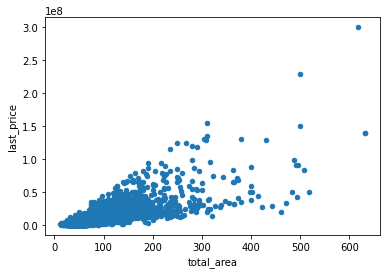

In [52]:
data.plot(x='total_area', y='last_price', kind='scatter');

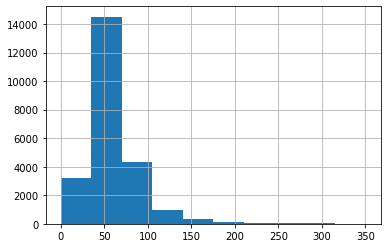

In [53]:
data ['total_area'].hist (bins=10, range= (0,350));

Мы можем сказать, что большинство квартир на рынке представлены в площади до 150 квадратных метров

In [54]:
data [data['total_area']>400]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_meter_price,weekday,month,year,floor_type,distance
660,3,49950000.0,483.90,2017-10-04,7+,3.200,6,312.500,4,NaN,False,False,26.40,0.0,Санкт-Петербург,23079.0,945.0,3,461.0,3,22.0,391.0,103223.81,2,10,2017,другой,1.0
3117,19,140000000.0,631.00,2019-03-30,7+,3.325,5,160.000,5,NaN,False,False,60.00,0.0,Санкт-Петербург,25707.0,4972.0,0,3000.0,2,210.0,NaN,221870.05,5,3,2019,последний,5.0
3676,12,28789000.0,441.98,2019-01-23,4,2.800,6,63.600,6,NaN,False,False,35.05,0.0,Санкт-Петербург,20552.0,5181.0,0,3000.0,0,3000.0,NaN,65136.43,2,1,2019,последний,5.0
4237,1,50000000.0,517.00,2017-10-14,7+,3.325,4,332.000,3,NaN,False,False,22.00,0.0,Санкт-Петербург,22835.0,1847.0,2,477.0,2,540.0,NaN,96711.80,5,10,2017,другой,2.0
5893,3,230000000.0,500.00,2017-05-31,6,3.200,7,123.900,7,NaN,False,False,40.00,0.0,Санкт-Петербург,32440.0,5297.0,0,3000.0,2,198.0,50.0,460000.00,2,5,2017,последний,5.0
6221,8,34000000.0,470.30,2018-01-14,4,2.800,3,248.700,3,NaN,False,False,40.00,0.0,Санкт-Петербург,43756.0,15459.0,1,852.0,3,122.0,179.0,72294.28,6,1,2018,последний,15.0
6621,20,99000000.0,488.00,2017-04-09,5,2.950,20,216.000,17,NaN,False,False,50.00,0.0,Санкт-Петербург,27641.0,4598.0,1,646.0,1,368.0,351.0,202868.85,6,4,2017,другой,5.0
8018,20,84000000.0,507.00,2015-12-17,5,4.450,7,301.500,7,True,False,False,45.50,1.0,Санкт-Петербург,26765.0,5735.0,2,110.0,0,3000.0,1078.0,165680.47,3,12,2015,последний,6.0
9826,1,43185328.0,494.10,2017-05-12,1,2.850,12,17.600,3,NaN,False,False,0.00,0.0,Санкт-Петербург,28529.0,6832.0,1,592.0,0,3000.0,5.0,87402.00,4,5,2017,другой,7.0
12401,20,91500000.0,495.00,2017-06-19,7+,4.650,7,347.500,7,NaN,False,False,25.00,0.0,Санкт-Петербург,26765.0,5735.0,2,110.0,0,3000.0,14.0,184848.48,0,6,2017,последний,6.0


1 аномальная строка с однокомнатной квартирой, где жилая площадь 17,6, а общая 494. Удалим эту строку

**В остальном можно сказать, что у общай площади самое высокое влияние на цену, но чем выше площадь, тем ниже это влияние.** Начиная 

In [55]:
data.drop(index=9826, inplace=True)

In [56]:
filtered_data = data[(data['living_area']+data['kitchen_area'])>data['total_area']] #проверим удалились все аномальные значения, где общая площадь была меньше суммы площади кухни и жилой площади
filtered_data [['total_area', 'living_area', 'kitchen_area']]

,total_area,living_area,kitchen_area


<a id="living_area"></a> 
### Жилая площадь

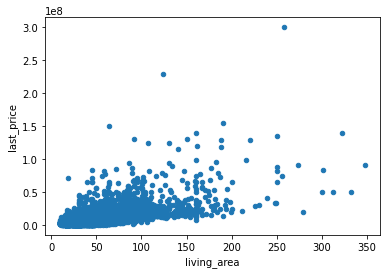

In [57]:
data.plot(x='living_area', y='last_price', kind='scatter');

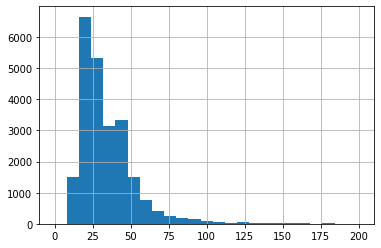

In [58]:
data ['living_area'].hist (bins=25, range= (0,200));

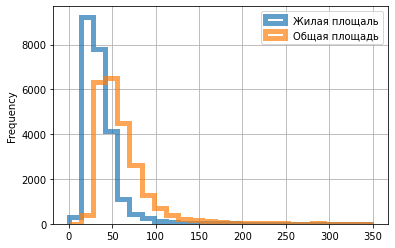

In [59]:
ax = data.plot(kind='hist', y='living_area', histtype='step', range=(0, 350), bins=25,
linewidth=5, alpha=0.7, label='Жилая площаль')
data.plot(kind='hist', y='total_area', histtype='step', range=(0, 350), bins=25,
linewidth=5, alpha=0.7, label='Общая площадь', ax=ax, grid=True, legend=True);

В блольшинстве квартир жилая площадь не превышает 100 метров, а пик приходится на квартиры с жилой площадью до 25 метров.

А вот тут намного больше выбросов. Скорее всего причиной того аномальные значения, которых было много именно в этом поле. Возможно пользователи не знают, как его правильно заполнять, поэтому анализ этих данных будет немного недостоверным

In [60]:
print('Коэффициент коллеряции жилой площади и цены квартиры')
data['living_area'].corr(data['last_price'])

Коэффициент коллеряции жилой площади и цены квартиры


0.6459080819590179

<a id="kitchen"></a> 

### Площадь кухни

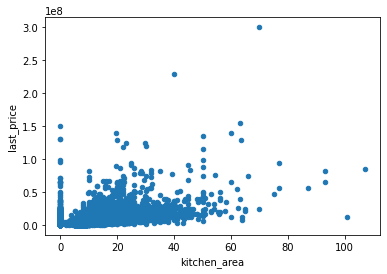

In [61]:
data.plot(x='kitchen_area', y='last_price', kind='scatter');

Большое количество данных на нуле — это студии, но есть ещё и аномалии с большими кухнями, посмотрим на них внимательнее

In [62]:
big_kitchens = data[data['kitchen_area']>60]
big_kitchens [['last_price','total_area','living_area','kitchen_area','square_meter_price']]

,last_price,total_area,living_area,kitchen_area,square_meter_price
492,95000000.0,216.0,86.0,77.0,439814.81
1026,155000000.0,310.0,190.0,63.0,500000.00
1085,75000000.0,323.0,255.7,66.0,232198.14
2489,12500000.0,255.0,153.9,100.7,49019.61
4394,57000000.0,174.0,95.0,77.0,327586.21
6193,24300000.0,230.0,90.0,70.0,105652.17
7543,130000000.0,307.8,187.9,63.4,422352.18
10867,56844500.0,177.9,87.2,87.2,319530.64
13139,55000000.0,288.0,100.7,62.0,190972.22
14644,47000000.0,150.0,58.0,75.0,313333.33


In [63]:
data.loc[2489]

total_images                              9
last_price                       12500000.0
total_area                            255.0
first_day_exposition    2017-04-21 00:00:00
rooms                                     3
ceiling_height                         2.65
floors_total                              2
living_area                           153.9
floor                                     2
is_apartment                            NaN
studio                                False
open_plan                             False
kitchen_area                          100.7
balcony                                 0.0
locality_name               Санкт-Петербург
airports_nearest                    29544.0
city_centers_nearest                 6916.0
parks_around3000                          0
parks_nearest                        3000.0
ponds_around3000                          3
ponds_nearest                         198.0
days_exposition                       102.0
square_meter_price              

<a id="low_price"></a> 
### Аномальные цены
Мы уже удалили некоторые аномальные цены. Теперь ещё нужно проанализировать сильно низкие цены в Санкт-Петербурге. 1 из примеров мы видели выше. Средние цены 210 тысяч за квадратный метр (вторичное жильё). Поставим фильтр на всё, что ниже 50 тысяч

In [64]:
data[(data['square_meter_price'] < 50000) & (data['locality_name'] == 'Санкт-Петербург')]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_meter_price,weekday,month,year,floor_type,distance
2489,9,12500000.0,255.00,2017-04-21,3,2.65,2,153.900,2,NaN,False,False,100.70,0.0,Санкт-Петербург,29544.0,6916.0,0,3000.0,3,198.0,102.0,49019.61,4,4,2017,последний,7.0
2520,0,2300000.0,65.00,2017-01-24,3,2.65,5,35.000,1,NaN,False,False,30.00,0.0,Санкт-Петербург,25060.0,14647.0,0,3000.0,0,3000.0,16.0,35384.62,1,1,2017,первый,15.0
2805,2,2100000.0,45.00,2019-04-12,2,2.50,2,31.000,1,NaN,False,False,6.00,0.0,Санкт-Петербург,37842.0,17233.0,0,3000.0,1,409.0,NaN,46666.67,4,4,2019,первый,17.0
3325,0,3500000.0,94.00,2018-07-23,3,3.00,23,64.000,10,NaN,False,False,12.00,0.0,Санкт-Петербург,39236.0,10010.0,1,937.0,3,162.0,3.0,37234.04,0,7,2018,другой,10.0
4248,8,1200000.0,49.10,2018-10-21,4,2.50,5,36.900,1,NaN,False,False,5.20,0.0,Санкт-Петербург,17539.0,12313.0,0,3000.0,0,3000.0,44.0,24439.92,6,10,2018,первый,12.0
4903,0,3500000.0,94.00,2018-07-24,3,2.80,23,64.000,10,NaN,False,False,12.00,0.0,Санкт-Петербург,11596.0,13277.0,0,3000.0,0,3000.0,9.0,37234.04,1,7,2018,другой,13.0
7756,1,4390000.0,151.80,2017-04-28,6,3.50,6,106.500,6,False,False,False,14.30,1.0,Санкт-Петербург,24576.0,2270.0,0,3000.0,0,3000.0,44.0,28919.63,4,4,2017,последний,2.0
8646,0,3500000.0,94.00,2018-07-27,3,2.70,23,64.000,10,NaN,False,False,12.00,0.0,Санкт-Петербург,28801.0,6173.0,1,236.0,0,3000.0,6.0,37234.04,4,7,2018,другой,6.0
9964,5,3500000.0,88.80,2018-10-02,4,2.80,5,63.600,1,NaN,False,False,0.00,0.0,Санкт-Петербург,11609.0,10539.0,0,3000.0,1,96.0,63.0,39414.41,1,10,2018,первый,11.0
12186,1,4900000.0,132.05,2017-09-21,5,2.60,9,91.785,7,NaN,False,False,0.00,0.0,Санкт-Петербург,13592.0,14670.0,1,430.0,0,3000.0,133.0,37107.16,3,9,2017,другой,15.0


In [65]:
data.drop(data[(data['square_meter_price'] < 50000) & (data['locality_name'] == 'Санкт-Петербург')].index, inplace=True) #удалим эти строки
data[(data['square_meter_price'] < 50000) & (data['locality_name'] == 'Санкт-Петербург')]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_meter_price,weekday,month,year,floor_type,distance


<a id="room_number"></a> 

### Количество комнат

In [66]:
data['last_price'].max()

300000000.0

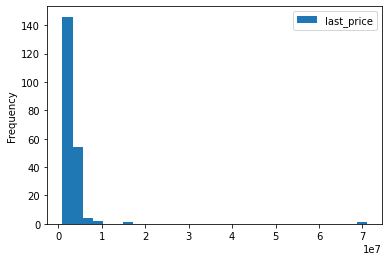

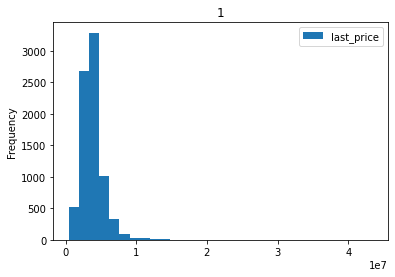

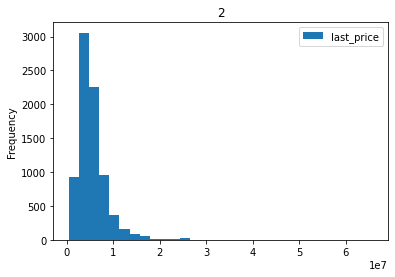

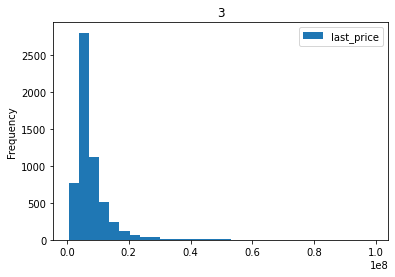

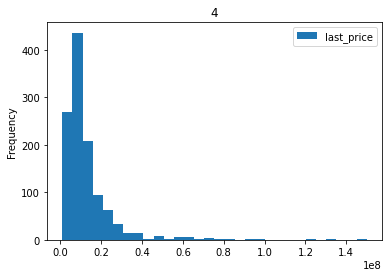

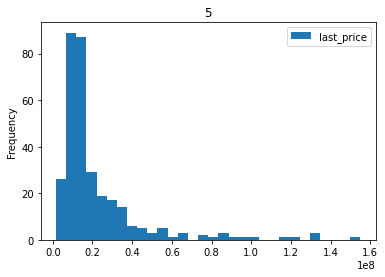

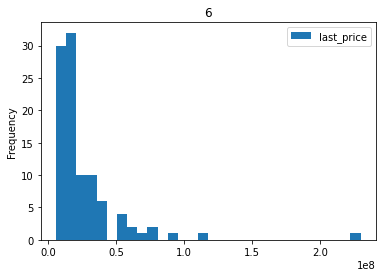

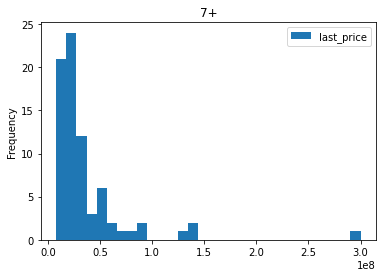

In [67]:
for name, group_data in data.groupby ('rooms'):
    group_data.plot (y='last_price', title = name, kind = 'hist', bins = 30)

Мы видим некоторые квартиры, которые стоят очень дорого в каждой из групп, эти выбросы находятся достаточно далёко от остальных, поэтому можно некоторые из них удалить по каждой из групп.

In [68]:
data[(data['rooms'] == 0) & (data['last_price'] > 10000000)] #В студиях все цены до 10 000 000, значит вся эта группа — это аномальные значения
#этот выброс очень далеко от других значений поэтому его нужно удалить

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_meter_price,weekday,month,year,floor_type,distance
19392,5,71000000.0,371.0,2018-07-26,0,3.57,7,18.0,6,NaN,True,True,0.0,0.0,Санкт-Петербург,25257.0,6060.0,1,761.0,1,584.0,90.0,191374.66,3,7,2018,другой,6.0
20082,10,16300000.0,98.4,2017-11-08,0,3.10,5,60.5,2,NaN,True,False,0.0,0.0,Санкт-Петербург,26972.0,5819.0,0,3000.0,1,674.0,537.0,165650.41,2,11,2017,другой,6.0


In [69]:
data.drop(data[(data['rooms'] == 0) & (data['last_price'] > 10000000)].index, inplace=True)

In [70]:
data[(data['rooms'] == 0) & (data['last_price'] > 10000000)]  #проверяем остались ли эти значения

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_meter_price,weekday,month,year,floor_type,distance


В остальных группах таких очевидных аномальных значений нет

In [71]:
for name, group_data in data.groupby('rooms'): #теперь анализируем по группам зависимость цены и общей площали
    correlation = group_data['last_price'].corr(group_data['total_area'])
    print(f"Корреляци для группы с {name} комнатами: {correlation}")

Корреляци для группы с 0 комнатами: 0.6919565069890897
Корреляци для группы с 1 комнатами: 0.6346001398720417
Корреляци для группы с 2 комнатами: 0.7285668398996261
Корреляци для группы с 3 комнатами: 0.7643765615186772
Корреляци для группы с 4 комнатами: 0.7366930236973067
Корреляци для группы с 5 комнатами: 0.7226272403328443
Корреляци для группы с 6 комнатами: 0.6700629930635696
Корреляци для группы с 7+ комнатами: 0.7548957748984938


Зависимость цены от площади квартиры растёт до 3х комнат в квартире, потом это зависимость начинает снижаться.

Сделаем такой же анализ по ценнам за квадратный метр.

In [72]:
for name, group_data in data.groupby('rooms'): #теперь анализируем по группам зависимость цены и общей площали
    correlation = group_data['total_area'].corr(group_data['square_meter_price'])
    print(f"Корреляци для группы с {name} комнатами: {correlation}")

Корреляци для группы с 0 комнатами: -0.020049967617637353
Корреляци для группы с 1 комнатами: 0.1756533421982738
Корреляци для группы с 2 комнатами: 0.431345279991723
Корреляци для группы с 3 комнатами: 0.5048480291972297
Корреляци для группы с 4 комнатами: 0.49596908124737277
Корреляци для группы с 5 комнатами: 0.44535093706338325
Корреляци для группы с 6 комнатами: 0.35585282871691526
Корреляци для группы с 7+ комнатами: 0.42540936397077417


Походая зависимость и с ценой за квадратный метр. Чем больше площадь, тем больше цена за квадтрный метр. Но в студиях это завимсоть отрицательная и тоже начинает снижаться, когда комнат в квартире становиться больше 4

In [73]:
for name, group_data in data.groupby('rooms'): #теперь анализируем по группам зависимость цены и общей площали
    correlation = group_data['last_price'].corr(group_data['kitchen_area'])
    print(f"Корреляци для группы с {name} комнатами: {correlation}")

Корреляци для группы с 0 комнатами: nan
Корреляци для группы с 1 комнатами: 0.3805411308194597
Корреляци для группы с 2 комнатами: 0.510953310918079
Корреляци для группы с 3 комнатами: 0.5237816230839867
Корреляци для группы с 4 комнатами: 0.43157482287465065
Корреляци для группы с 5 комнатами: 0.4960493747047756
Корреляци для группы с 6 комнатами: 0.3889573824008134
Корреляци для группы с 7+ комнатами: 0.5827515285476805


In [74]:
for name, group_data in data.groupby('rooms'): #теперь анализируем по группам зависимость цены и общей площали
    correlation = group_data['last_price'].corr(group_data['living_area'])
    print(f"Корреляци для группы с {name} комнатами: {correlation}")

Корреляци для группы с 0 комнатами: 0.6348857014678049
Корреляци для группы с 1 комнатами: 0.28663861661975076
Корреляци для группы с 2 комнатами: 0.4588403162828038
Корреляци для группы с 3 комнатами: 0.549529662376846
Корреляци для группы с 4 комнатами: 0.6346916534634508
Корреляци для группы с 5 комнатами: 0.6397591376261382
Корреляци для группы с 6 комнатами: 0.3001321973373735
Корреляци для группы с 7+ комнатами: 0.48234170671452814


In [75]:
data['rooms'].value_counts()

1     8026
2     7929
3     5795
4     1170
5      319
0      206
6      100
7+      76
Name: rooms, dtype: int64

А вот тут эта зависимость сохраняется до квартиру с 5 комнатами, но почти не влияет на 1 комнатные квартиры. А это одна из самых больших групп в нашем наборе данных.

<a id="сeiling_height"></a> 

### Высота потолков

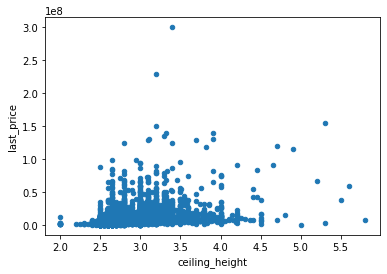

In [76]:
data.plot(x='ceiling_height', y='last_price', kind='scatter');

In [77]:
for name, group_data in data.groupby('rooms'): #теперь анализируем по группам зависимость цены и общей площали
    correlation = group_data['last_price'].corr(group_data['ceiling_height'])
    print(f"Корреляци для группы с {name} комнатами: {correlation}")

Корреляци для группы с 0 комнатами: 0.42328831554395574
Корреляци для группы с 1 комнатами: 0.31044966782288586
Корреляци для группы с 2 комнатами: 0.38133426479532884
Корреляци для группы с 3 комнатами: 0.35116078785230587
Корреляци для группы с 4 комнатами: 0.2877565252303214
Корреляци для группы с 5 комнатами: 0.4387526020176377
Корреляци для группы с 6 комнатами: 0.17962244018792678
Корреляци для группы с 7+ комнатами: 0.18565829029304742


In [78]:
data['last_price'].corr(group_data['ceiling_height'])

0.18565829029304742

Мы можем скзаать, что высота потолков больше всего влияет на цену студий и 5 комнатных квартир. В остальных случаях это не главный фактор при формировании цены
<a id="floor_type"></a> 

### Тип этажа квартиры («первый», «последний», «другой»);

In [79]:
for name, group_data in data.groupby('floor_type'): #теперь анализируем по группам зависимость цены и общей площали
    correlation = group_data['last_price'].corr(group_data['total_area'])
    print(f"Корреляци для группы квартир на {name} этаже: {correlation}")

Корреляци для группы квартир на другой этаже: 0.7675531132823671
Корреляци для группы квартир на первый этаже: 0.7682874847808255
Корреляци для группы квартир на последний этаже: 0.8058717010321735


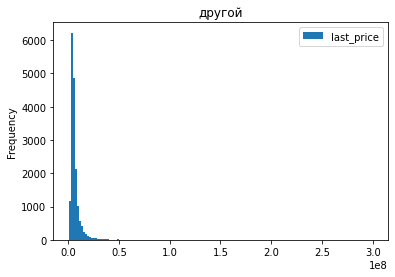

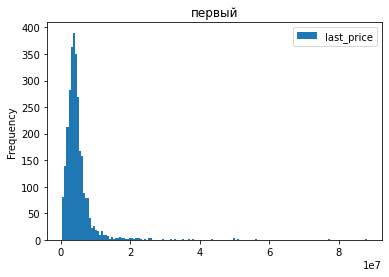

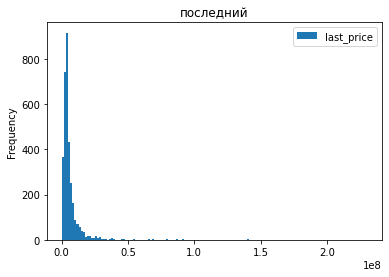

In [80]:
for name, group_data in data.groupby ('floor_type'):
    group_data.plot (y='last_price', title = name, kind = 'hist', bins = 150)

In [81]:
grouped_data = data.groupby('rooms')

for name, group_data in grouped_data:
    print(f"Количество комнат: {name}")
    print(round(group_data.groupby('floor_type')['last_price'].median(),2))

Количество комнат: 0
floor_type
другой       2715000.0
первый       2183000.0
последний    3150000.0
Name: last_price, dtype: float64
Количество комнат: 1
floor_type
другой       3700000.0
первый       3075000.0
последний    3200000.0
Name: last_price, dtype: float64
Количество комнат: 2
floor_type
другой       5130593.0
первый       3850000.0
последний    4100000.0
Name: last_price, dtype: float64
Количество комнат: 3
floor_type
другой       6500000.0
первый       5000000.0
последний    5700000.0
Name: last_price, dtype: float64
Количество комнат: 4
floor_type
другой       9750000.0
первый       6600000.0
последний    9600000.0
Name: last_price, dtype: float64
Количество комнат: 5
floor_type
другой       14000000.0
первый       10000000.0
последний    16750000.0
Name: last_price, dtype: float64
Количество комнат: 6
floor_type
другой       18338500.0
первый       13170500.0
последний    21250000.0
Name: last_price, dtype: float64
Количество комнат: 7+
floor_type
другой       24000000.0

В целом закономерность логичная. На первом этаже квартиры дешевле всего. 

На последнем этаже квартиры дешевле, чем на других, но дороже, чем на первом в квартирах с комнатами от 1 до 4.

В больших квартирах (5, 6) квартиры на последнем этаже дороже всего. Скорее всего это пентхаусы.

В студиях такая же ситуация, возможно есть выходы на крышу, масандры или видовые окна.

<a id="floor_number"></a> 

### Общее количество этажей в доме

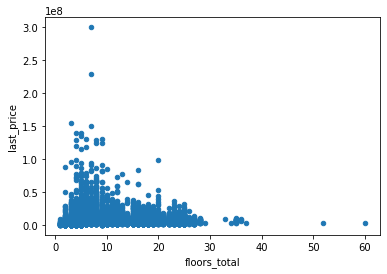

In [82]:
data.plot(x='floors_total', y='last_price', kind='scatter');

In [83]:
for name, group_data in data.groupby('rooms'):
    correlation = group_data['last_price'].corr(group_data['floors_total'], method='pearson', min_periods=1)
    print(f"Корреляци для группы с {name} комнатами: {correlation}")

Корреляци для группы с 0 комнатами: 0.004189424608726328
Корреляци для группы с 1 комнатами: 0.2222897240656384
Корреляци для группы с 2 комнатами: 0.2362956146828346
Корреляци для группы с 3 комнатами: 0.16629330410802576
Корреляци для группы с 4 комнатами: 0.09446032284479229
Корреляци для группы с 5 комнатами: -0.005209395801751105
Корреляци для группы с 6 комнатами: -0.03240360382077416
Корреляци для группы с 7+ комнатами: 0.09888369494986207


В целом общее количество этажей увеличивает цену, но незначительно. В группах с 5 и 6 комнатами уменьшает незначительно, а в группе 7+ увеличивает значительно. Скорее всего это связано вновь с пентазаузами и видовыми окнами

#### Расстояние до центра города в метрах

In [84]:
for name, group_data in data.groupby('rooms'):
    correlation = group_data['last_price'].corr(group_data['city_centers_nearest'], method='pearson', min_periods=1)
    print(f"Корреляци для группы с {name} комнатами: {correlation}")

Корреляци для группы с 0 комнатами: -0.5468722508572595
Корреляци для группы с 1 комнатами: -0.36469095427321924
Корреляци для группы с 2 комнатами: -0.31939207319599466
Корреляци для группы с 3 комнатами: -0.30740595540525617
Корреляци для группы с 4 комнатами: -0.23706363548639697
Корреляци для группы с 5 комнатами: -0.17630363458013898
Корреляци для группы с 6 комнатами: -0.08131530036550022
Корреляци для группы с 7+ комнатами: 0.008807798154715125


Всё логично, чем дальше центр, тем ниже цены, но прослеживается одинаковая тенденция: чем меньше комнат, тем меньше это имеет значение

#### Расстояние до ближайшего парка

In [85]:
for name, group_data in data.groupby('rooms'):
    correlation = group_data['last_price'].corr(group_data['parks_nearest'], method='pearson', min_periods=1)
    print(f"Корреляци для группы с {name} комнатами: {correlation}")

Корреляци для группы с 0 комнатами: -0.19680382813834832
Корреляци для группы с 1 комнатами: -0.24215275217184531
Корреляци для группы с 2 комнатами: -0.26831416115761153
Корреляци для группы с 3 комнатами: -0.24478398747702465
Корреляци для группы с 4 комнатами: -0.2639450474045193
Корреляци для группы с 5 комнатами: -0.15212216153349786
Корреляци для группы с 6 комнатами: 0.08136681603544083
Корреляци для группы с 7+ комнатами: 0.2695685254014443


И тут всё логично, чем дальше парк, тем ниже цена. Это не влияет на квартиры, где больше 6 комнат, но там очень небольшие группы, поэтому велика возможность ошибки

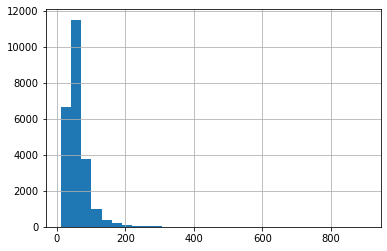

In [86]:
#код ревьюера
data2 = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
(data2['total_area']).hist(bins=30);

<a id="speed"></a> 

### Анализ скорости продажи квартир
построена гистограмма;
рассчитаны среднее и медиана;
описано, сколько обычно занимает продажа и указано, какие продажи можно считать быстрыми, а какие — необычно долгими.

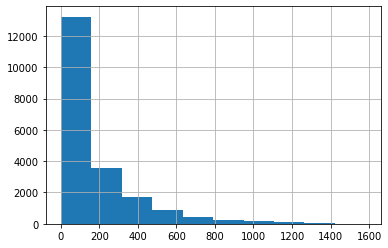

In [87]:
data ['days_exposition'].hist(bins=10);

In [88]:
print(f"Медиана длительности размещения объявлений {data ['days_exposition'].median()}")
print(f"Cреднее длительности размещения объявлений {data ['days_exposition'].mean()}")

Медиана длительности размещения объявлений 95.0
Cреднее длительности размещения объявлений 180.81947093051684


То есть в среднем продажа не занимает больше полугода. Однако у нас есть значения и по несколько лет. Возможно это значит, что объявления просто забыли снять с продажи.

In [89]:
for name, group_data in data.groupby('rooms'):
    correlation = group_data['last_price'].corr(group_data['days_exposition'], method='pearson', min_periods=1)
    print(f"Корреляци для группы с {name} комнатами: {correlation}")

Корреляци для группы с 0 комнатами: -0.003523779803479632
Корреляци для группы с 1 комнатами: 0.04321376800956855
Корреляци для группы с 2 комнатами: 0.09368014457866104
Корреляци для группы с 3 комнатами: 0.09032884930250908
Корреляци для группы с 4 комнатами: 0.1103377315547855
Корреляци для группы с 5 комнатами: 0.15177946422424274
Корреляци для группы с 6 комнатами: -0.07301965463985469
Корреляци для группы с 7+ комнатами: -0.12892100646982962


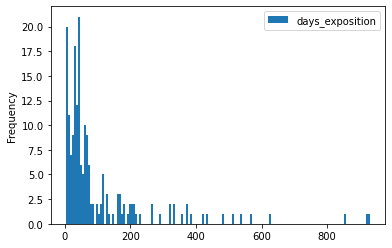

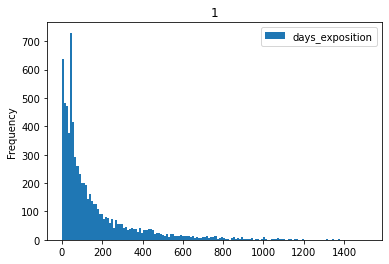

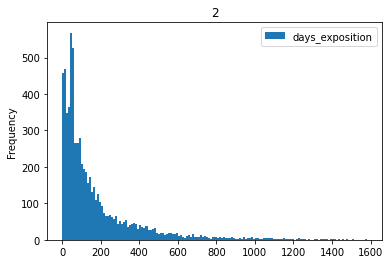

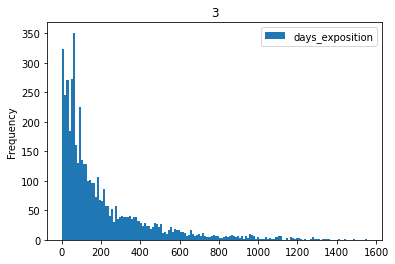

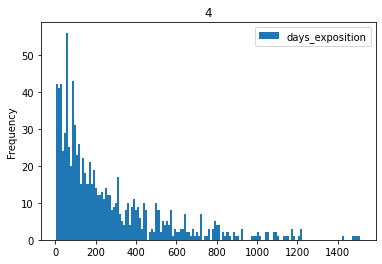

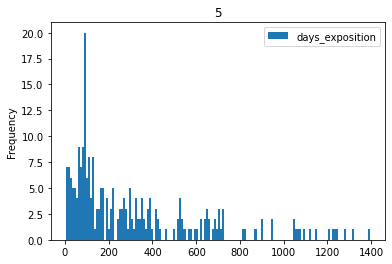

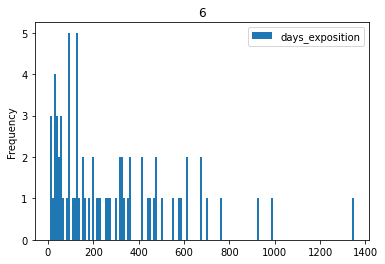

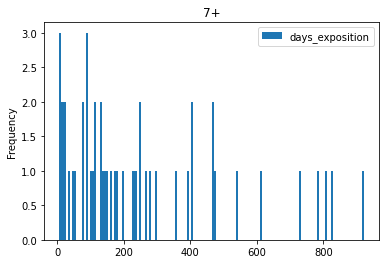

In [90]:
for name, group_data in data.groupby ('rooms'):
    group_data.plot (y='days_exposition', title = name, kind = 'hist', bins = 150)

Естественно, чем больше и дороже кваритры, тем дольше они продаются. Погрешность этого правила идёт на больших квартирах больше 6 комнат, но их не так много в выборке для достоврености данных.

Судя по гистограмме все продажи большее 600 дней можно считать аномально длинными. А все продажи меньше 2х месяцев быстрыми

<a id="factors"></a> 

### Факторы, которые больше всего влияют на общую (полную) стоимость объекта

Уже выше мы проанализировали основные показатели, но ещё раз сделаем сводную таблицу корреляции следующих показателей

  - общая площадь;
  - жилая площадь;
  - площадь кухни;
  - количество комнат;
  - тип этажа, на котором расположена квартира (первый, последний, другой);
  - дата размещения (день недели, месяц, год).

In [91]:
print(f"Корреляция цены и общей площади {data['last_price'].corr(data['total_area'])}\n")
print(f"Корреляция цены и жилой площади {data['last_price'].corr(data['living_area'])}\n")
print(f"Корреляция цены и площади кухни {data['last_price'].corr(data['kitchen_area'])}\n")
print ('Кореляция общей площади и ценности в зависимости от количествая комнат')
for name, group_data in data.groupby('rooms'): #теперь анализируем по группам зависимость цены и общей площали
    correlation = group_data['last_price'].corr(group_data['total_area'])
    print(f"Корреляции для группы с {name} комнатами: {correlation}")
print ('\nКореляция общей площади и ценности в зависимости от типа этажа')
for name, group_data in data.groupby('floor_type'): #теперь анализируем по группам зависимость цены и общей площали
    correlation = group_data['last_price'].corr(group_data['total_area'])
    print(f"Корреляции для группы квартир на {name} этаже: {correlation}")
print ('\nМедиана цены разных типов этажей сгруппированая по количеству комнат')

grouped_data = data.groupby('rooms')

for name, group_data in grouped_data:
    print(f"Количество комнат: {name}")
    print(round(group_data.groupby('floor_type')['last_price'].median(),2))

Корреляция цены и общей площади 0.7751977080815818

Корреляция цены и жилой площади 0.649426183276627

Корреляция цены и площади кухни 0.4806672156924458

Кореляция общей площади и ценности в зависимости от количествая комнат
Корреляции для группы с 0 комнатами: 0.6919565069890897
Корреляции для группы с 1 комнатами: 0.6346001398720417
Корреляции для группы с 2 комнатами: 0.7285668398996261
Корреляции для группы с 3 комнатами: 0.7643765615186772
Корреляции для группы с 4 комнатами: 0.7366930236973067
Корреляции для группы с 5 комнатами: 0.7226272403328443
Корреляции для группы с 6 комнатами: 0.6700629930635696
Корреляции для группы с 7+ комнатами: 0.7548957748984938

Кореляция общей площади и ценности в зависимости от типа этажа
Корреляции для группы квартир на другой этаже: 0.7675531132823671
Корреляции для группы квартир на первый этаже: 0.7682874847808255
Корреляции для группы квартир на последний этаже: 0.8058717010321735

Медиана цены разных типов этажей сгруппированая по количест

Из этого и графиков выше мы можем сделать вывод, что общая площадь больше всего влияет на цену квартиры. При это этот показатель растёт вплоть до квартир с 3 комнатами, а потом начинает немного падать.

На первом этаже квартиры дешевле всего. 
На последнем этаже квартиры дешевле, чем на других, но дороже, чем на первом в квартирах с комнатами от 1 до 4.
В больших квартирах (5, 6) квартиры на последнем этаже дороже всего. Скорее всего это пентхаусы.
В студиях такая же ситуация, возможно есть выходы на крышу, масандры или видовые окна.

In [92]:
print(f"Корреляция цены и общей площади {data['last_price'].corr(data['weekday'])}\n")
print(f"Корреляция цены и общей площади {data['last_price'].corr(data['month'])}\n")
print(f"Корреляция цены и общей площади {data['last_price'].corr(data['year'])}\n")

Корреляция цены и общей площади -0.002482022177324404

Корреляция цены и общей площади 0.004809602939182923

Корреляция цены и общей площади -0.05024548386663698



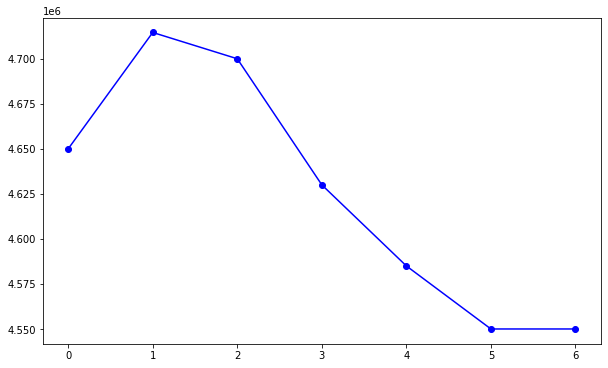

In [93]:
medium_price_weekday= data.groupby('weekday')['last_price'].median()
plt.figure(figsize=(10, 6))
plt.plot(medium_price_weekday, marker='o', linestyle='-', color='b');

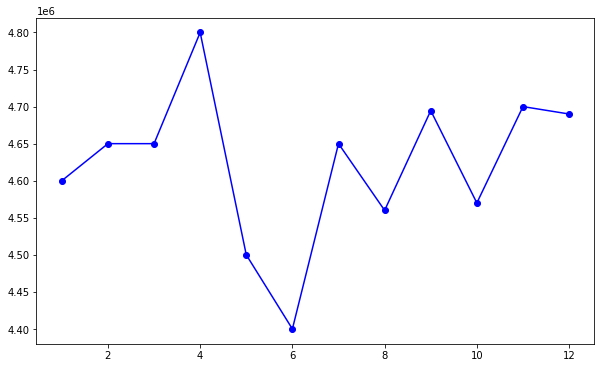

In [94]:
medium_price_month= data.groupby('month')['last_price'].median()
plt.figure(figsize=(10, 6))
plt.plot(medium_price_month, marker='o', linestyle='-', color='b');

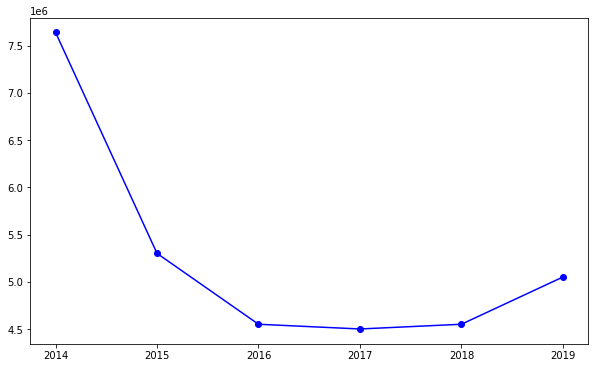

In [95]:
medium_price_year= data.groupby('year')['last_price'].median()
plt.figure(figsize=(10, 6))
plt.plot(medium_price_year, marker='o', linestyle='-', color='b');

В случае с днём недели ситуация очевидна: квартиру нужно выставлять в начале недели. Желательно во воторник
С месяцами есть пики и падения: лучший месяц для публикации — это апрель, а худший — июнь
После 2014 года было большое падение цен и оно продолжилось до 2016, после чего стабилизировалось и пошло в рост.

<a id="average_price"></a> 

### Cредняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений:
    - выделены населённые пункты с самой высокой и низкой стоимостью квадратного метра.

In [96]:
#Находим самые популярные области и выводим на экран таблицу, которая включает цены за квадратный метр в квартирах этих областей
top_10_localities = data['locality_name'].value_counts().head(10).index
filtered_data = data[data['locality_name'].isin(top_10_localities)]
top_10_localities_prices = filtered_data.groupby('locality_name')['square_meter_price'].mean()
print(f'Цены за квадратный метр в квартирах самых популярных областей на сервисе:\n{top_10_localities_prices}')

average_price_per_sqm = data.groupby('locality_name')['square_meter_price'].mean()

# Населенный пункт с самой высокой стоимостью квадратного метра
most_expensive_locality = average_price_per_sqm.idxmax()
highest_price_per_sqm = average_price_per_sqm.max()

# Населенный пункт с самой низкой стоимостью квадратного метра
cheapest_locality = average_price_per_sqm.idxmin()
lowest_price_per_sqm = average_price_per_sqm.min()

print(f"Наиболее дорогой населенный пункт: {most_expensive_locality}, средняя цена за квадратный метр: {highest_price_per_sqm}")
print(f"Наименее дорогой населенный пункт: {cheapest_locality}, средняя цена за квадратный метр: {lowest_price_per_sqm}")

Цены за квадратный метр в квартирах самых популярных областей на сервисе:
locality_name
Всеволожск            66955.046801
Выборг                58141.909325
Гатчина               68465.250228
Колпино               75379.389615
Пушкин               103125.819377
Санкт-Петербург      113297.007754
деревня Кудрово       95324.930508
посёлок Мурино        85798.399593
посёлок Парголово     90064.007768
посёлок Шушары        78493.534591
Name: square_meter_price, dtype: float64
Наиболее дорогой населенный пункт: Зеленогорск, средняя цена за квадратный метр: 115122.79958333333
Наименее дорогой населенный пункт: деревня Старополье, средняя цена за квадратный метр: 11206.220000000001


<a id="Piter"></a> 

### Квартиры в Санкт-Петербурге и их среднюю стоимость на разном удалении от центра»:
- учтён каждый километр расстояния, известны средние цены квартир в одном километре от центра, в двух и так далее;
- описано, как стоимость объекта зависит от расстояния до центра города;
- построен график изменения средней цены для каждого километра от центра Петербурга.

In [97]:
#Создадим таблицу, в которой будут только квартиры Санкт-Петербурга
peter = data[data['locality_name'] == 'Санкт-Петербург']
#Проверим есть ли пропуски в нужном столбце
peter ['distance'].isna().sum()

0

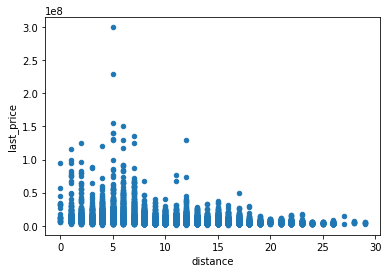

In [98]:
peter.plot(x='distance', y='last_price', kind='scatter');

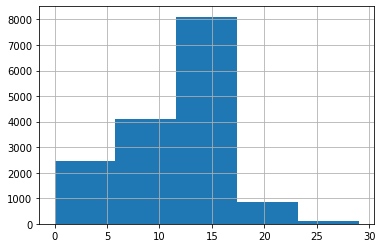

In [99]:
peter['distance'].hist(bins=5);

In [100]:
medium_price_center= round(peter.groupby('distance')['last_price'].median(),2)
print("Средние цены в зависимости от расстояния до центра города")
medium_price_center

Средние цены в зависимости от расстояния до центра города


distance
0.0     13500000.0
1.0     11100000.0
2.0      9875000.0
3.0      8400000.0
4.0      9200000.0
5.0      9490000.0
6.0      8850000.0
7.0      7797500.0
8.0      7440000.0
9.0      5300500.0
10.0     5000000.0
11.0     5095000.0
12.0     5000000.0
13.0     5200000.0
14.0     4870000.0
15.0     4900000.0
16.0     4770000.0
17.0     4580000.0
18.0     4300000.0
19.0     4500000.0
20.0     5550000.0
21.0     5289476.0
22.0     4925000.0
23.0     4545000.0
24.0     3480000.0
25.0     3794881.0
26.0     3320000.0
27.0     8300000.0
28.0     4990000.0
29.0     4535000.0
Name: last_price, dtype: float64

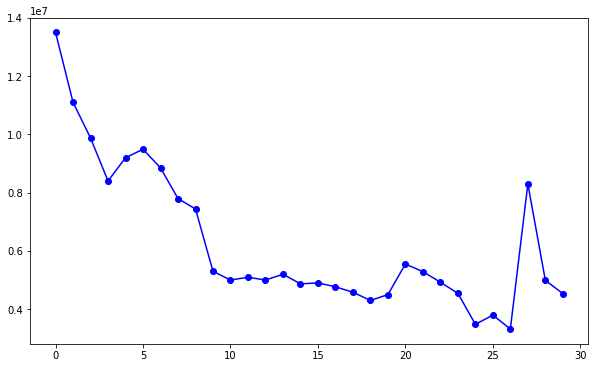

In [101]:
plt.figure(figsize=(10, 6))
plt.plot(medium_price_center, marker='o', linestyle='-', color='b');

Закономерный результат, чем ближе квартиры к центру города, тем они дороже, причем резкое падение идёт где-то до 3 километров, потом идёт небольшой скачок и цены постепенно падают, с ещё одним скачком после 26 километров.

/opt/conda/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:337: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


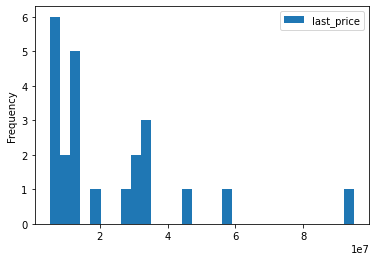

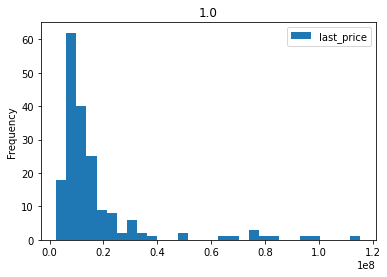

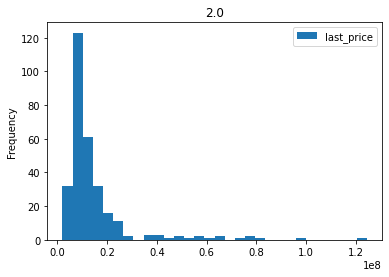

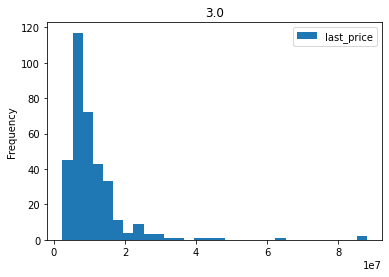

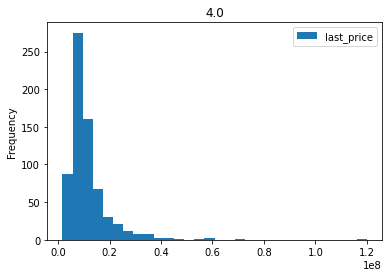

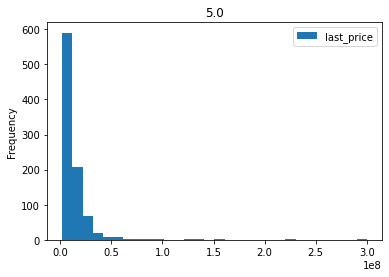

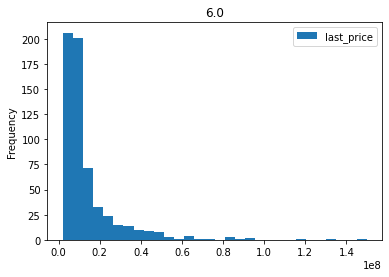

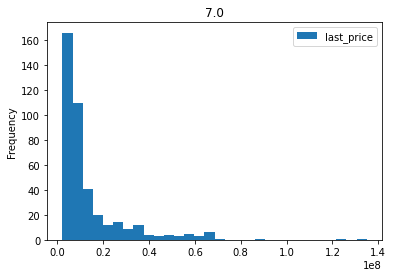

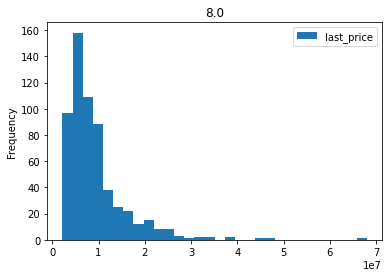

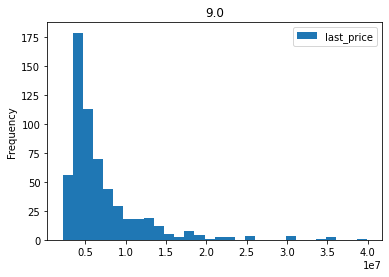

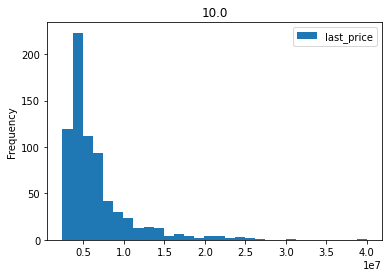

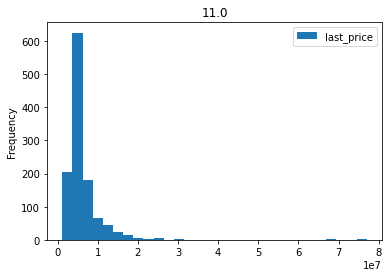

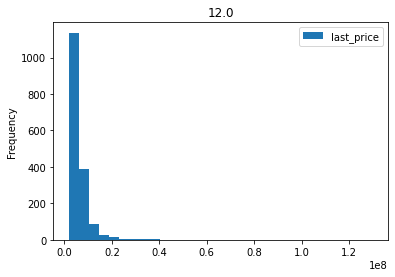

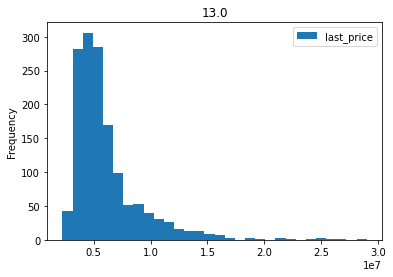

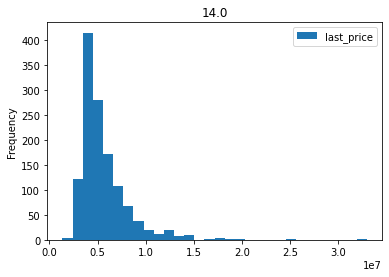

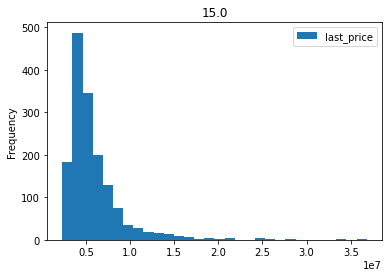

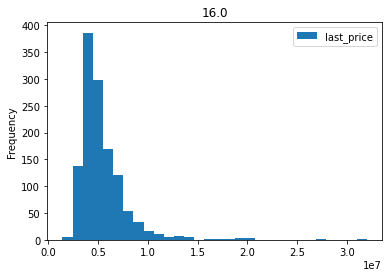

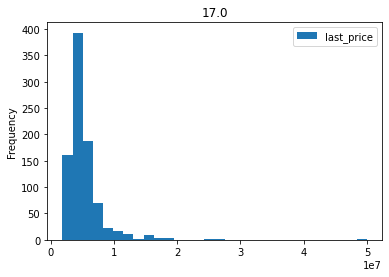

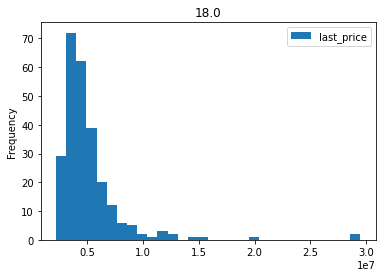

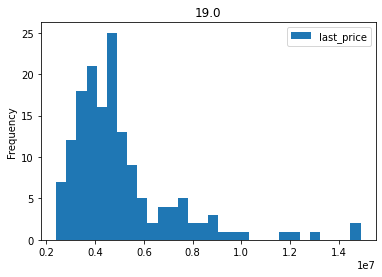

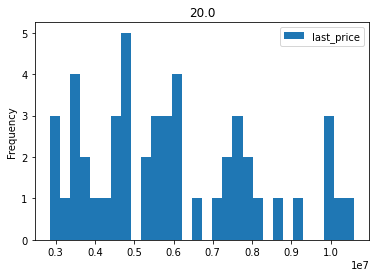

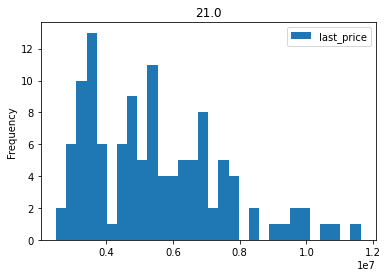

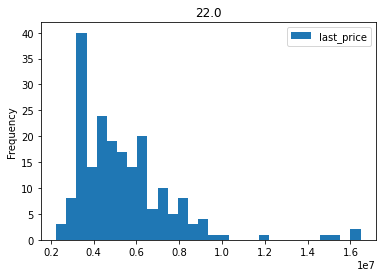

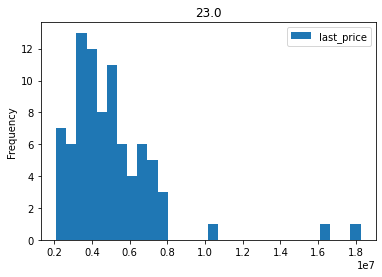

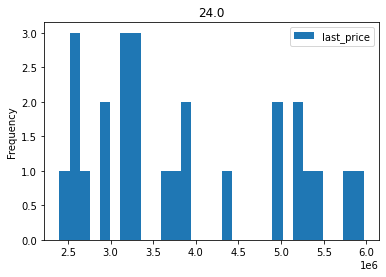

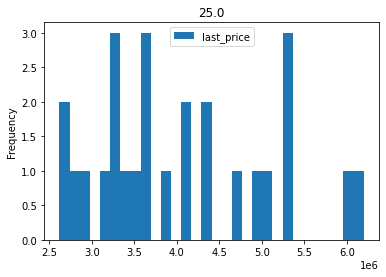

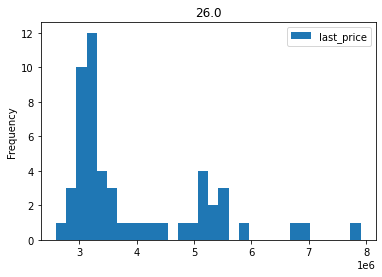

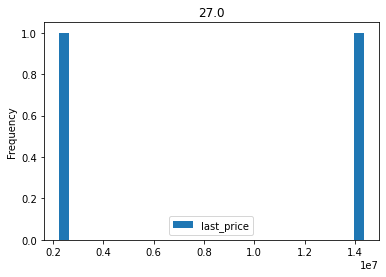

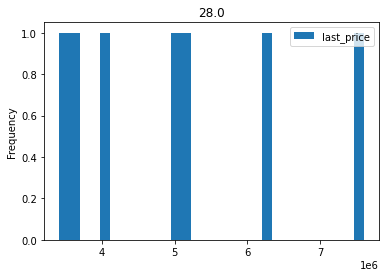

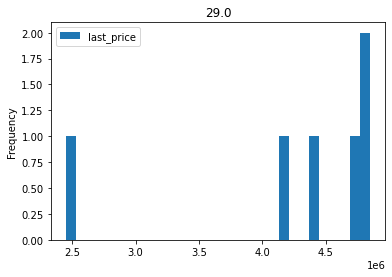

In [102]:
for name, group_data in peter.groupby ('distance'):
    group_data.plot (y='last_price', title = name, kind = 'hist', bins = 30)

В пределах одного километра в случае с первыми двумя разброс цен небольшой, а вот на третьем километре уже есть существенные различия

<a id="сonclusion"></a> 

## Общий вывод

**1. В таблице было очень много пропусков и аномальных данных. Как это можно избежать в будущем**
- Убрать пункт студия и из формы. Должен быть выбор количества комнат, в котором будет (0) — студия, но в данные будет записываться как ноль.
- Было бы важно посчитать влияет ли статус апарартаментов на цену квартиры и как долго она продаётся. Для этого нужно сделать этот пункт обязательным при внесении данных.
- Местоположение должно выбираться через ЯндексКарты, чтобы не было неявныз дубликатов в названии. Это же поможет автоматически заполнить пропуски в полях расстояние до центра, аэропорта, парков и так далее.
- Установить в поля высота потолков минимум (2) и максимум (7 - возможно высокие потолки могут быть в пентхаусах), чтобы пользователь видел, что это ошибка.
- Установить условие в форме, что общее количество этажей не может быть меньше этажа на котором квартира. Этаж должен быть обязательным для формы, так как это влияет на цену.
- Через медианнок количество дней размещения присылать пользователям напоминания и спрашивать не продали ли они квартиру. Возможно с рекомендациями, которые помогают продать квартиру быстрее.
- Установить наличие или отсуствтие балкона, как обязательное поле.
- Установить условие, что общая площадь не может быть меньше суммы жилой площади и площади кухни.
- Автоматически правильно записывать тип данных в столбец с датой.
- Автоматически вычислять цену одного квадтратного места и тип этажа. Эта информация поможет и покупателям при принятии решения и нам при анализе.
      
**2. Анализ данных не показал каких-то удивительных значений.**

Общая площадь больше всего влияет на цену квартиры. При это этот показатель растёт вплоть до квартир с 3 комнатами, а потом начинает немного падать.

На первом этаже квартиры дешевле всего. На последнем этаже квартиры дешевле, чем на других, но дороже, чем на первом в квартирах с комнатами от 1 до 4В больших квартирах (5, 6) квартиры на последнем этаже дороже всего. Скорее всего это пентхаусы.
В студиях такая же ситуация, возможно есть выходы на крышу, масандры или видовые окна.

Чем больше и дороже кваритры, тем дольше они продаются. Погрешность этого правила идёт на больших квартирах больше 6 комнат, но их не так много в выборке для достоврености данных.

Судя по графикам все продажи большее 600 дней можно считать аномально длинными. А все продажи меньше 2х месяцев быстрыми

В среднем продажа не занимает больше полугода. Однако у нас есть значения и по несколько лет. Возможно это значит, что объявления просто забыли снять с продажи. 

Закономерный результат, чем ближе квартиры к центру города, тем они дороже, причем резкое падение идёт где-то до 3 километров, потом идёт небольшой скачок и цены постепенно падают, с ещё одним скачком после 26 километров, но это скорее связано  с небольшим количеством квартир в той области.

В случае с днём недели ситуация очевидна: квартиру нужно выставлять в начале недели. Желательно во воторник
С месяцами есть пики и падения: лучший месяц для публикации — это апрель, а худший — июнь
После 2014 года было большое падение цен и оно продолжилось до 2016, после чего стабилизировалось и пошло в рост.